# Runs in IPL 2022 analysis

IPL 2022 data is picked from Kaggle and analyis is done in a batting perspective. I have used pandas and numpy to do the analysis. I have used matplotlib and seaborn to visualize the data.

In [5]:
data_dir = './ipl-player-performance-dataset/IPL Dataset - 2022/IPL Dataset - 2022'

In [6]:
import os
os.listdir(data_dir)

['Best Bowling Economy Innings - 2022.csv',
 'Most Wickets - 2022.csv',
 'Fastest Centuries - 2022.csv',
 'Most Fours Innings - 2022.csv',
 'Best Bowling Strike Rate Innings - 2022.csv',
 'Most Sixes Innings - 2022.csv',
 'Most Dot Balls Innings - 2022.csv',
 'Fastest Fifties - 2022.csv',
 'Most Runs Conceded Innings - 2022.csv',
 'Most Runs - 2022.csv']

## Data Preparation and Cleaning

In this section, we will prepare the data for analysis by cleaning, transforming the Most Runs in IPL 2022 dataset. We handle the missing, incorrect and invalid data particularly in average and NO columns. We also add a new colum called Impact which is the product of average and strike rate and justifies the impact of the batsman in the team.

In [7]:
import pandas as pd

df = pd.read_csv(data_dir + '/Most Runs - 2022.csv')

In [8]:
# To see the first 5 rows of the DataFrame
print(df.head())

# To see the number of rows and columns
print(df.shape)

# To see the column names
print(df.columns)

# To see the data types of the columns
print(df.dtypes)

# To see basic statistical details like percentile, mean, std etc. of a data frame
print(df.describe())

   POS           Player  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  \
0    1      Jos Buttler   17    17   2   863   116  57.53  579  149.05    4   
1    2        K L Rahul   15    15   3   616  103*  51.33  455  135.38    2   
2    3  Quinton De Kock   15    15   1   508  140*  36.29  341  148.97    1   
3    4    Hardik Pandya   15    15   4   487   87*  44.27  371  131.26    0   
4    5     Shubman Gill   16    16   2   483    96   34.5  365  132.32    0   

   50  4s  6s  
0   4  83  45  
1   4  45  30  
2   3  47  23  
3   4  49  12  
4   4  51  11  
(162, 14)
Index(['POS', 'Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR',
       '100', '50', '4s', '6s'],
      dtype='object')
POS         int64
Player     object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Avg        object
BF          int64
SR        float64
100         int64
50          int64
4s          int64
6s          int64
dtype: object
              POS   

In [9]:
# To check for missing values
df.isnull().sum()

POS       0
Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

In [10]:
# Handling the error related to 'NAType' when converting 'Avg' to float
# First, replace '-' with NaN in 'Avg' column
df['Avg'].replace('-', pd.NA, inplace=True)

In [11]:
# Then, convert 'Avg' to float
df['Avg'] = df['Avg'].fillna(df['Runs'])

In [12]:
# Convert 'Avg' column to float
df['Avg'] = df['Avg'].astype(float)

In [13]:
# Converting 'HS' (Highest Score) column to float after removing any asterisks (*)
# Remove asterisks (*) and convert to float
df['HS'] = df['HS'].str.replace('*', '').astype(float)

In [14]:
# Addition of new column 'Impact_Score' to the DataFrame. It is calculated as (Runs * SR) / 100
df['Impact_Score'] = (df['Runs'] * df['SR']) / 100

## Exploratory Analysis and Visualization

Comprensive analysis of the data is done in this section. We have used matplotlib and seaborn to visualize the data. We have used barplot, scatterplot, lineplot, piechart, histogram and boxplot to visualize the data. Overall statistics of the data is also done in this section.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

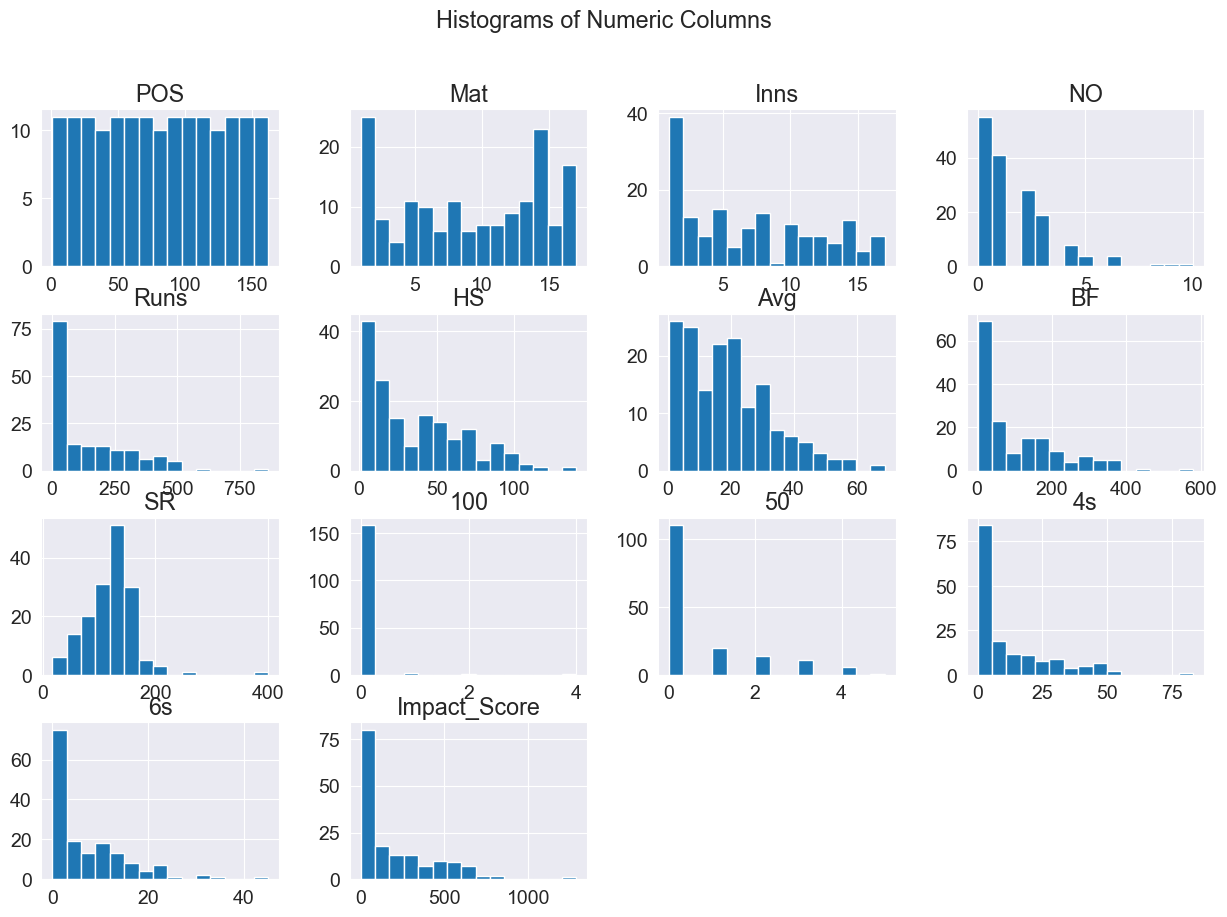

In [16]:
# Plotting histograms for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

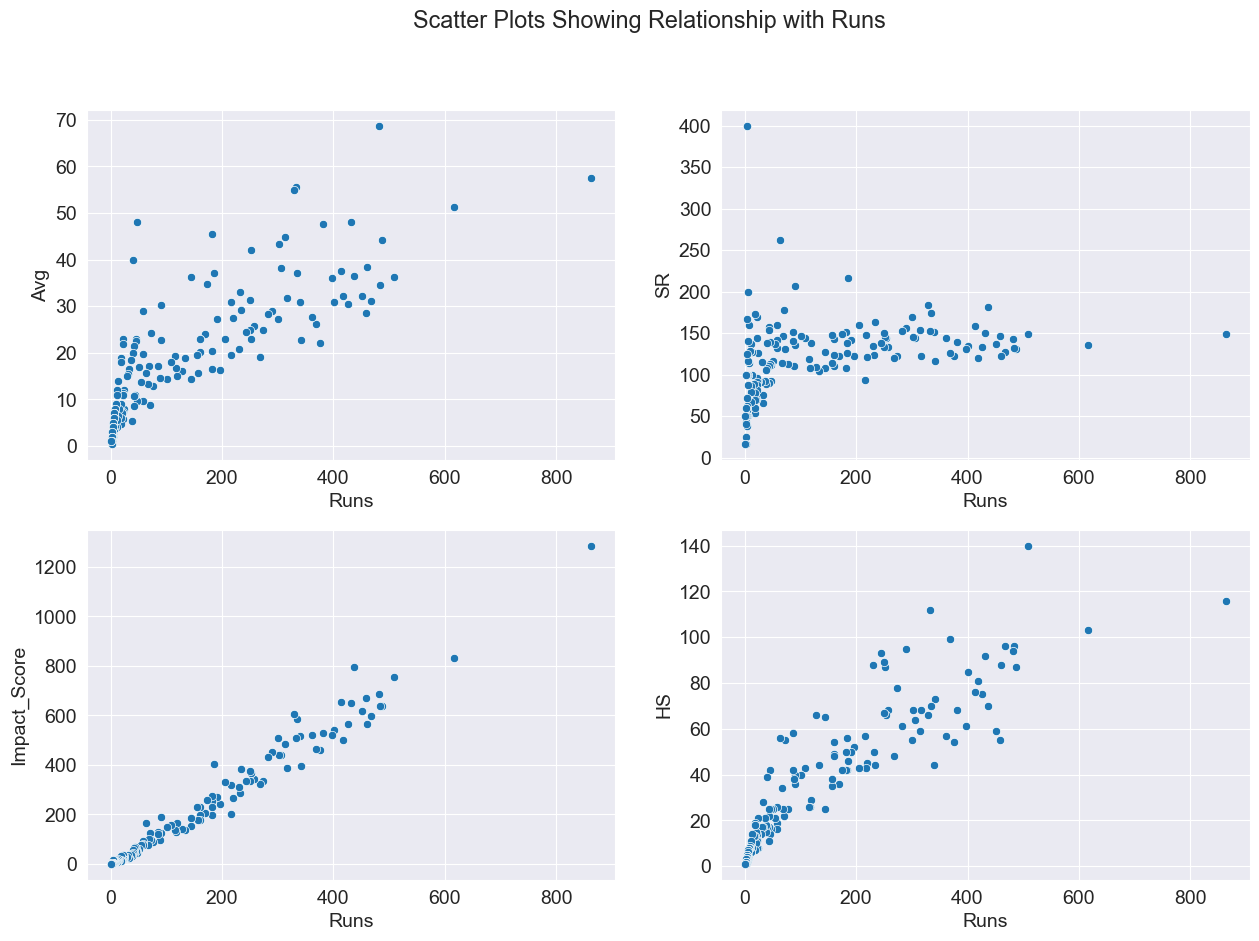

In [17]:
# Scatter plot to explore relationships between 'Runs' and other numeric variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data=df, x='Runs', y='Avg', ax=axes[0, 0])
sns.scatterplot(data=df, x='Runs', y='SR', ax=axes[0, 1])
sns.scatterplot(data=df, x='Runs', y='Impact_Score', ax=axes[1, 0])
sns.scatterplot(data=df, x='Runs', y='HS', ax=axes[1, 1])
plt.suptitle('Scatter Plots Showing Relationship with Runs')
plt.show()


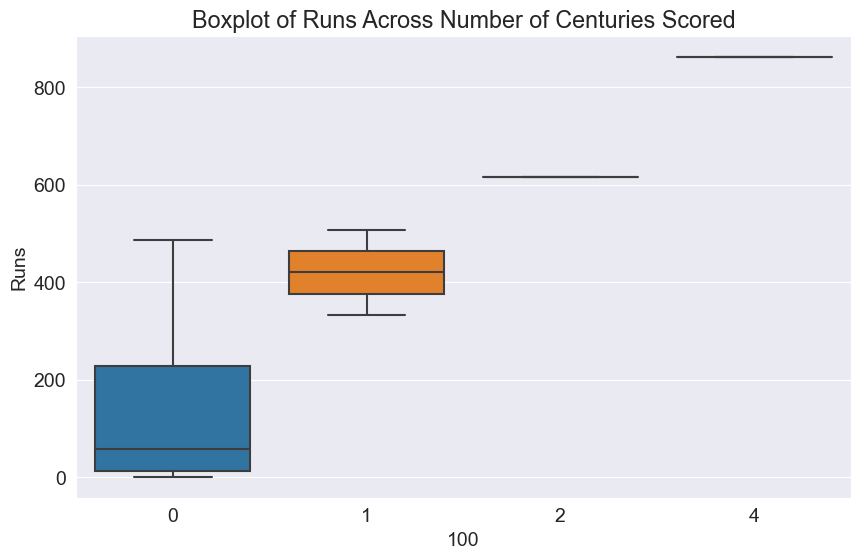

In [18]:
# Boxplot for 'Runs' across '100' (Centuries) to see if there's a trend
plt.figure(figsize=(10, 6))
sns.boxplot(x='100', y='Runs', data=df)
plt.title('Boxplot of Runs Across Number of Centuries Scored')
plt.show()

In [19]:
# Compute basic statistics for numeric columns
stats = df.describe()
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
stats.loc['var'] = stats.loc['std'] / stats.loc['mean']
stats.loc['disparity'] = stats.loc['max'] / stats.loc['min']
stats

,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Impact_Score
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,81.500000,9.160494,7.141975,1.586420,142.296296,36.302469,19.332346,106.061728,120.406235,0.049383,0.679012,12.450617,6.555556,196.729244
std,46.909487,5.047493,4.816982,1.819989,161.252161,30.698916,13.953494,114.571234,45.192799,0.366322,1.172428,15.314529,8.070343,233.335998
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.500000,1.000000,16.660000,0.000000,0.000000,0.000000,0.000000,0.166600
25%,41.250000,5.000000,3.000000,0.000000,14.500000,9.250000,7.082500,14.000000,94.082500,0.000000,0.000000,1.000000,0.000000,13.271700
50%,81.500000,9.500000,7.000000,1.000000,65.000000,26.000000,17.100000,47.500000,123.620000,0.000000,0.000000,5.000000,3.000000,90.631300
75%,121.750000,14.000000,11.000000,2.000000,241.500000,56.750000,28.167500,176.500000,144.247500,0.000000,1.000000,21.000000,11.000000,334.699600
max,162.000000,17.000000,17.000000,10.000000,863.000000,140.000000,68.710000,579.000000,400.000000,4.000000,5.000000,83.000000,45.000000,1286.301500
range,161.000000,16.000000,16.000000,10.000000,862.000000,139.000000,68.210000,578.000000,383.340000,4.000000,5.000000,83.000000,45.000000,1286.134900
var,0.575577,0.551007,0.674461,1.147231,1.133214,0.845643,0.721769,1.080232,0.375336,7.418030,1.726667,1.230022,1.231069,1.186077


## Some analyis to ponder upon

#### Players with highest averages

In [20]:
top_5_avg = df.sort_values(by='Avg', ascending=False).head(5)
top_5_avg[['Player', 'Avg']].reset_index(drop=True)

,Player,Avg
0,David Miller,68.71
1,Jos Buttler,57.53
2,Rajat Patidar,55.50
3,Dinesh Karthik,55.00
4,K L Rahul,51.33


#### Relationship between sixes and total runs

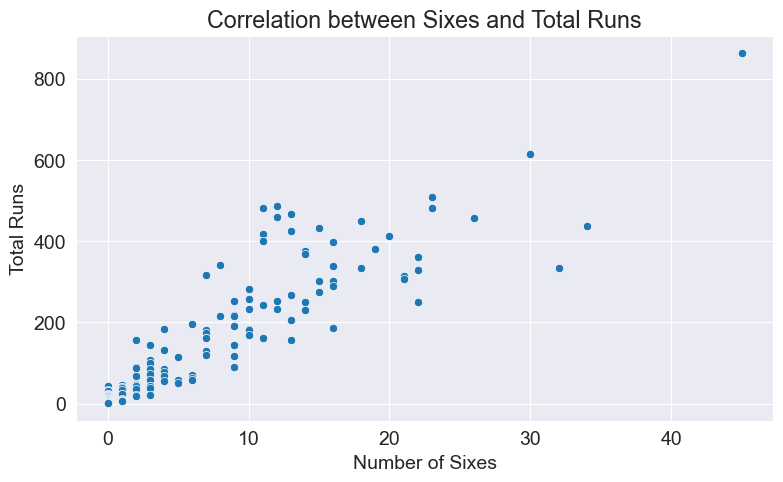

In [21]:
sns.scatterplot(data=df, x='6s', y='Runs')
plt.title('Correlation between Sixes and Total Runs')
plt.xlabel('Number of Sixes')
plt.ylabel('Total Runs')
plt.show()

#### Players who score most of their runs in sixes

In [22]:
df['Runs_From_Sixes'] = df['6s'] * 6
df['Sixes_Run_Proportion'] = (df['Runs_From_Sixes'] / df['Runs']).where(df['Runs'] > 100, 0)
top_sixes_proportion = df.sort_values(by='Sixes_Run_Proportion', ascending=False).head(5)
top_sixes_proportion[['Player', 'Sixes_Run_Proportion']].reset_index(drop=True)

,Player,Sixes_Run_Proportion
0,Andre Russell,0.573134
1,Rovman Powell,0.528000
2,Tim David,0.516129
3,Marcus Stoinis,0.500000
4,Liam Livingstone,0.466819


#### Strike rate of players

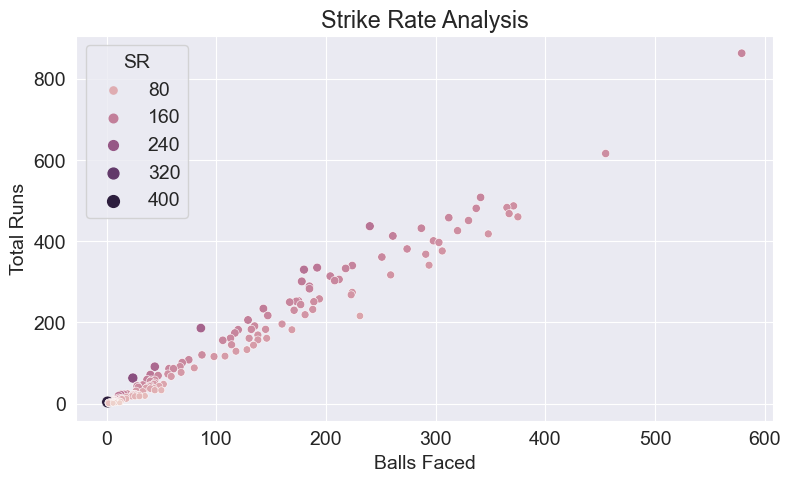

In [23]:
sns.scatterplot(data=df, x='BF', y='Runs', hue='SR', size='SR')
plt.title('Strike Rate Analysis')
plt.xlabel('Balls Faced')
plt.ylabel('Total Runs')
plt.show()

#### Players with the highest impact

In [24]:
top_5_impact_score = df.sort_values(by='Impact_Score', ascending=False).head(5)
top_5_impact_score[['Player', 'Impact_Score']].reset_index(drop=True)

,Player,Impact_Score
0,Jos Buttler,1286.3015
1,K L Rahul,833.9408
2,Liam Livingstone,795.6896
3,Quinton De Kock,756.7676
4,David Miller,686.4832
